In [1]:
import numpy as np 
import pandas as pd
from scipy import stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ool_pds = pd.read_csv('ool_pds.csv')
ool_pds.head()

,CASEID,W1_CASEID,W2_CASEID2,W1_TM_START,W1_TM_FINISH,W1_WEIGHT1,W1_WEIGHT2,W1_WEIGHT3,W2_TM_START,W2_TM_FINISH,...,PPREG9,PPRENT,PPSTATEN,PPT01,PPT1317,PPT18OV,PPT25,PPT612,PPWORK,PPNET
0,1,2,820,BLANKED FOR CONFIDENTIALITY - ICPSR,BLANKED FOR CONFIDENTIALITY - ICPSR,4.8559,2.4181,2.3315,BLANKED FOR CONFIDENTIALITY - ICPSR,BLANKED FOR CONFIDENTIALITY - ICPSR,...,3,1,32,0,0,2,0,0,3,1
1,2,3,,BLANKED FOR CONFIDENTIALITY - ICPSR,BLANKED FOR CONFIDENTIALITY - ICPSR,0.0415,0.2091,0.1954,BLANKED FOR CONFIDENTIALITY - ICPSR,BLANKED FOR CONFIDENTIALITY - ICPSR,...,9,2,93,0,0,2,0,0,6,1
2,3,4,1198,BLANKED FOR CONFIDENTIALITY - ICPSR,BLANKED FOR CONFIDENTIALITY - ICPSR,0.7628,3.8416,3.5907,BLANKED FOR CONFIDENTIALITY - ICPSR,BLANKED FOR CONFIDENTIALITY - ICPSR,...,7,1,74,0,0,2,2,0,1,1
3,4,5,240,BLANKED FOR CONFIDENTIALITY - ICPSR,BLANKED FOR CONFIDENTIALITY - ICPSR,0.0089,0.0448,0.0418,BLANKED FOR CONFIDENTIALITY - ICPSR,BLANKED FOR CONFIDENTIALITY - ICPSR,...,9,2,91,0,0,1,0,0,5,1
4,5,6,,BLANKED FOR CONFIDENTIALITY - ICPSR,BLANKED FOR CONFIDENTIALITY - ICPSR,1.9532,0.9727,0.9378,BLANKED FOR CONFIDENTIALITY - ICPSR,BLANKED FOR CONFIDENTIALITY - ICPSR,...,3,1,32,0,0,3,0,0,1,1


In [3]:
df = ool_pds[["W1_A1", "PPINCIMP", "PPAGE", "PPEDUCAT", "PPGENDER"]]

# We are centering all variables except for the age and the response variable
df['PPINCIMP'] = (df['PPINCIMP'] - int(df['PPINCIMP'].mean()))
df['PPGENDER'] = (df['PPGENDER'] - int(df['PPGENDER'].mean()))
df['PPEDUCAT'] = (df['PPEDUCAT'] - int(df['PPEDUCAT'].mean()))
df.head()

/home/melisan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/melisan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/melisan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

,W1_A1,PPINCIMP,PPAGE,PPEDUCAT,PPGENDER
0,2,2,56,0,1
1,3,-3,59,-1,0
2,2,5,36,2,0
3,1,-4,70,2,0
4,3,5,37,2,1


In [4]:
results = ols('W1_A1 ~ PPINCIMP', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  W1_A1   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     27.48
Date:                Tue, 07 Apr 2020   Prob (F-statistic):           1.73e-07
Time:                        06:14:43   Log-Likelihood:                -3685.2
No. Observations:                2294   AIC:                             7374.
Df Residuals:                    2292   BIC:                             7386.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6861      0.026    105.131      0.000       2.636       2.736
PPINCIMP      -0.0267      0.005     -5.242      0.000      -0.037      -0.017
==============================================================================
Omnibus:                       19.046   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.512
Skew:                           0.125   Prob(JB):                     0.000428
Kurtosis:                       2.685   Cond. No.                         5.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
results0 = ols('W1_A1 ~ PPINCIMP + PPEDUCAT', data=df).fit()
results0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  W1_A1   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     37.49
Date:                Tue, 07 Apr 2020   Prob (F-statistic):           9.53e-17
Time:                        06:14:43   Log-Likelihood:                -3661.9
No. Observations:                2294   AIC:                             7330.
Df Residuals:                    2291   BIC:                             7347.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8309      0.033     85.898      0.000       2.766       2.895
PPINCIMP      -0.0083      0.006     -1.448      0.148      -0.020       0.003
PPEDUCAT      -0.1986      0.029     -6.852      0.000      -0.255      -0.142
==============================================================================
Omnibus:                       10.977   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                9.625
Skew:                           0.102   Prob(JB):                      0.00813
Kurtosis:                       2.757   Cond. No.                         8.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
results1 = ols('W1_A1 ~ PPAGE + PPEDUCAT + PPGENDER', data=df).fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  W1_A1   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     91.64
Date:                Tue, 07 Apr 2020   Prob (F-statistic):           5.29e-56
Time:                        06:14:43   Log-Likelihood:                -3568.8
No. Observations:                2294   AIC:                             7146.
Df Residuals:                    2290   BIC:                             7169.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7016      0.082     45.183      0.000       3.541       3.862
PPAGE         -0.0198      0.001    -13.556      0.000      -0.023      -0.017
PPEDUCAT      -0.1940      0.025     -7.875      0.000      -0.242      -0.146
PPGENDER       0.1563      0.048      3.240      0.001       0.062       0.251
==============================================================================
Omnibus:                        0.139   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.933   Jarque-Bera (JB):                0.118
Skew:                           0.017   Prob(JB):                        0.943
Kurtosis:                       3.010   Cond. No.                         182.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0, 'Observation Number')

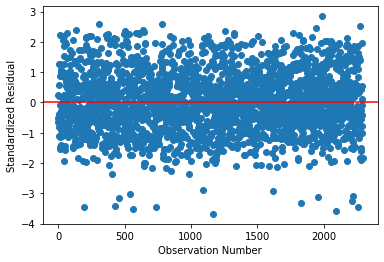

In [7]:
stdres=pd.DataFrame(results1.resid_pearson)
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')

Figure(432x288)


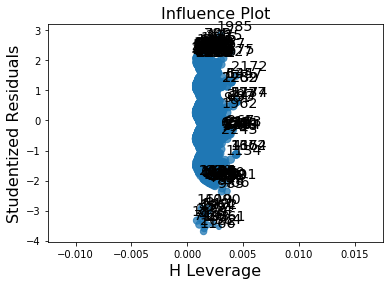

In [8]:
# leverage plot
fig=sm.graphics.influence_plot(results1, size=5, labels='None')
print(fig)

In [9]:
results2 = ols('W1_A1 ~ PPAGE + PPEDUCAT', data=df).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  W1_A1   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     131.7
Date:                Tue, 07 Apr 2020   Prob (F-statistic):           7.52e-55
Time:                        06:14:48   Log-Likelihood:                -3574.1
No. Observations:                2294   AIC:                             7154.
Df Residuals:                    2291   BIC:                             7171.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7948      0.077     49.368      0.000       3.644       3.946
PPAGE         -0.0199      0.001    -13.588      0.000      -0.023      -0.017
PPEDUCAT      -0.1979      0.025     -8.025      0.000      -0.246      -0.150
==============================================================================
Omnibus:                        0.376   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.829   Jarque-Bera (JB):                0.426
Skew:                           0.025   Prob(JB):                        0.808
Kurtosis:                       2.956   Cond. No.                         166.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

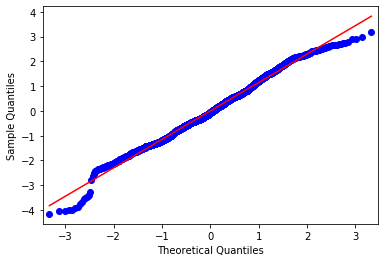

In [10]:
#Q-Q plot for normality
fig4=sm.qqplot(results2.resid, line='r')

Text(0.5, 0, 'Observation Number')

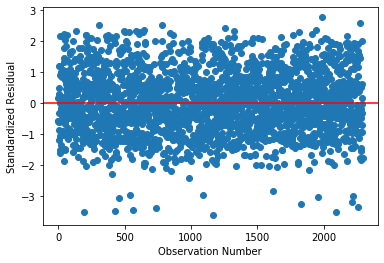

In [11]:
stdres=pd.DataFrame(results2.resid_pearson)
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')

In [ ]:
fig=sm.graphics.influence_plot(results2, size=5)
print(fig)